In [1]:
import numpy as np

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

In [2]:
import matplotlib.pyplot as plt
top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
# pre-processing the data for (a)
x1 = [[1] + i + [1] for i in top]
x2 = [[1] + i + [-1] for i in bottom]
data = x1 + x2
    
data = np.array(data)
np.random.shuffle(data)

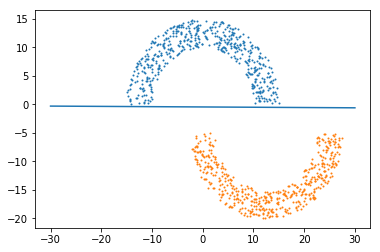

In [6]:
#对数据预处理，加上标签和偏移项1
x1=[[1]+i+[1] for i in top]
x2=[[1]+i+[-1] for i in bottom]
data=x1+x2
    
data=np.array(data)
np.random.shuffle(data)

#PLA
#de
def sign(x):
    if x>0:
        return 1
    else:
        return -1

#定义判别函数，判断所有数据是否分类完成
def Judge(x,w):
    #n为数据维度
    n=x.shape[1]-1
    flag=1
    for i in x:
        if sign(i[:n].dot(w))*i[-1]<0:
            flag=0
            break
    return flag

#定义PLA,k为步长
def PLA(x,k):
    #n为数据维度,m为数据数量,
    m,n=x.shape
    n-=1
    #初始化向量
    w=np.zeros(n)
    #记录最后一个更新的向量
    last=0
    #记录次数
    t=0
    if Judge(x,w):
        pass
    else:
        #记录取哪个元素
        j=0
        while Judge(x,w)==0:
            i=x[j]
            #print(i[:n],i[-1])
            if sign(i[:n].dot(w))*i[-1]<0:
                w+=k*i[-1]*i[:n]
                t+=1
                last=j
            j+=1
            if(j>=m):
                j=j%m
    return t,last,w
t,last,w=PLA(data,1)

#作图
r=2*(rad+thk)
X3=[-r,r]
Y3=[-(w[0]+w[1]*i)/w[2] for i in X3]

plt.scatter(X1,Y1,s=1)
plt.scatter(X2,Y2,s=1)
plt.plot(X3,Y3)
plt.show()

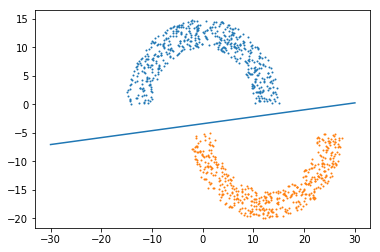

In [5]:
from numpy.linalg import inv

#对数据预处理
x1=[[1]+i for i in top]
y1=[1]*len(top)

x2=[[1]+i for i in bottom]
y2=[-1]*len(bottom)

X=np.array(x1+x2)
Y=np.array(y1+y2)

w1=inv(X.T.dot(X)).dot(X.T).dot(Y)

#作图
t=2*(rad+thk)
X4=[-t,t]
Y4=[-(w1[0]+w1[1]*i)/w1[2] for i in X4]


plt.scatter(X1,Y1,s=1)
plt.scatter(X2,Y2,s=1)
plt.plot(X4,Y4)
plt.show()